In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

color = "#00274C"
folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig1_system design/d_condensate analysis"
os.chdir(folder_save)

um_per_pxl = 0.117
area_FOV = 418 * 674 * um_per_pxl**2

In [2]:
# concat all csv files
lst_df = []
lst_N_per_FOV = []
lst_area_fraction = []
for f in os.listdir(folder_save):
    if f.startswith("condensates_AIO"):
        df = pd.read_csv(f)
        lst_df.append(df)
        lst_N_per_FOV.append(df.shape[0])
        lst_area_fraction.append(df["area_um2"].sum() / area_FOV)
df_all = pd.concat(lst_df)
df_perFOV_stats = pd.DataFrame(
    {
        "N_per_FOV": lst_N_per_FOV,
        "area_fraction": lst_area_fraction,
    },
    dtype=float,
)

## plot R

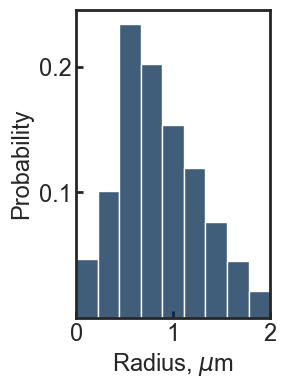

In [3]:
df_plot = df_all
df_plot["Radius_um"] = df_plot["R_nm"] / 1000
column_name = "Radius_um"
x_label = r"Radius, $\mu$m"
x_range = (0, 2)

plt.figure(figsize=(2.5, 4))
ax = sns.histplot(
    data=df_plot,
    x=column_name,
    bins=9,
    stat="probability",
    color=color,
    binrange=(x_range[0], x_range[1]),
)
plt.gca().spines[:].set_linewidth(2)
plt.xticks([0, 1, 2])
plt.yticks([0.1, 0.2])
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=17,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=2,
)
plt.xlim(x_range[0], x_range[1])
plt.xlabel(x_label, fontsize=17)
plt.ylabel("Probability", fontsize=17)
fname_save = "Condensate_" + column_name + "_histo.png"
plt.savefig(fname_save, format="png", bbox_inches="tight", dpi=300)
plt.show()

## plot aspect ratio

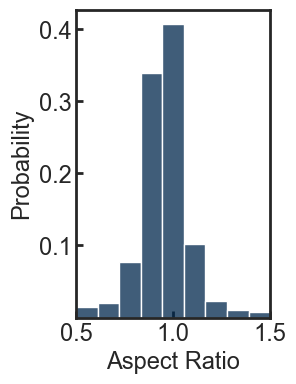

In [4]:
plt.figure(figsize=(2.5, 4))
ax = sns.histplot(
    data=df_all,
    x="aspect_ratio",
    bins=9,
    stat="probability",
    color=color,
    binrange=(0.5, 1.5),
)
plt.gca().spines[:].set_linewidth(2)
plt.yticks([0.1, 0.2, 0.3, 0.4])
plt.xticks(np.linspace(0.5, 1.5, 3))
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=17,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=2,
)
plt.xlim(0.5, 1.5)
plt.xlabel("Aspect Ratio", fontsize=17)
plt.ylabel("Probability", fontsize=17)
fname_save = "Condensate_aspect_ratio_histo.png"
plt.savefig(fname_save, format="png", bbox_inches="tight", dpi=300)
plt.show()

## plot N per FOV

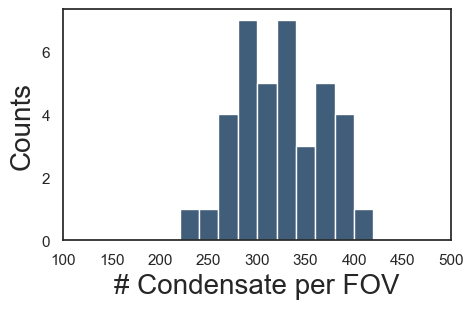

# FOV =  38
#Condensates: 12312.0


In [5]:
plt.figure(figsize=(5, 3))
ax = sns.histplot(
    data=df_perFOV_stats,
    x="N_per_FOV",
    bins=20,
    color=color,
    binrange=(100, 500),
)
plt.xlim(100, 500)
plt.xlabel("# Condensate per FOV", fontsize=20)
plt.ylabel("Counts", fontsize=20)
fname_save = "Condensate_NperFOV_histo.png"
plt.savefig(fname_save, format="png", bbox_inches="tight", dpi=300)
plt.show()

print("# FOV = ", df_perFOV_stats.shape[0])
print("#Condensates:", df_perFOV_stats["N_per_FOV"].sum())

## plot Area Frac

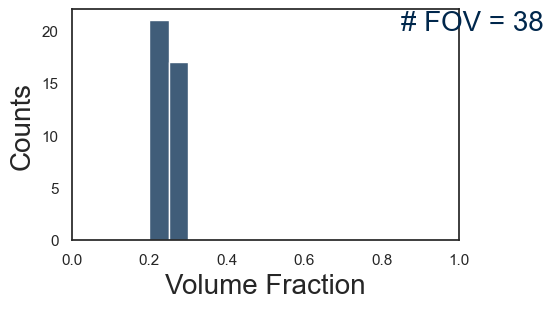

In [6]:
plt.figure(figsize=(5, 3))
ax = sns.histplot(
    data=df_perFOV_stats,
    x="area_fraction",
    bins=20,
    color=color,
    binrange=(0, 1),
)
plt.text(
    0.85,
    20,
    "# FOV = " + str(df_perFOV_stats.shape[0]),
    fontsize=20,
    color=color,
)
plt.xlim(0, 1)
plt.xlabel("Volume Fraction", fontsize=20)
plt.ylabel("Counts", fontsize=20)
fname_save = "Condensate_VolFrac_histo.png"
plt.savefig(fname_save, format="png", bbox_inches="tight", dpi=300)
plt.show()